In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FILE_PATH = r"C:\Users\onlin\Downloads\bank.csv"
df = pd.read_csv(FILE_PATH)

col_y = "deposit"

# --- Drop unnecessary columns (edit this list) ---
cols_drop = ["duration"]     # optional: ["duration", "day", "month"]
df = df.drop(columns=cols_drop)

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [3]:
# Display dataframe shape
df.shape

(11162, 16)

In [4]:
# Display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [5]:
# Check for missing values
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
# Display statistical summary of the dataframe
df.describe()

,age,balance,day,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,63.000000,854.000000,58.000000


In [7]:
# Target variable analysis + Quick checks
col_y = "deposit"   # target
df[col_y].value_counts()


deposit
no     5873
yes    5289
Name: count, dtype: int64

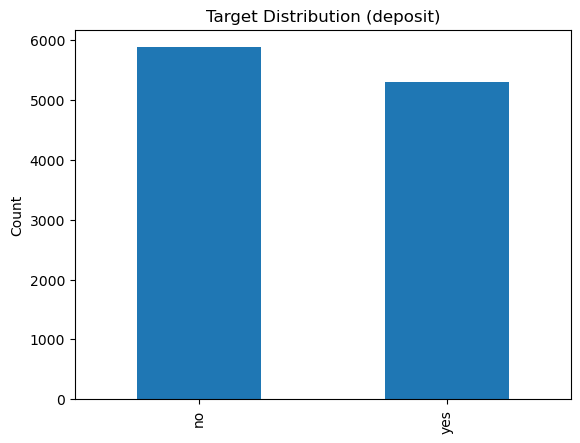

In [8]:
# Plot target distribution
df[col_y].value_counts().plot(kind="bar")
plt.title("Target Distribution (deposit)")
plt.xlabel("")
plt.ylabel("Count")
plt.show()


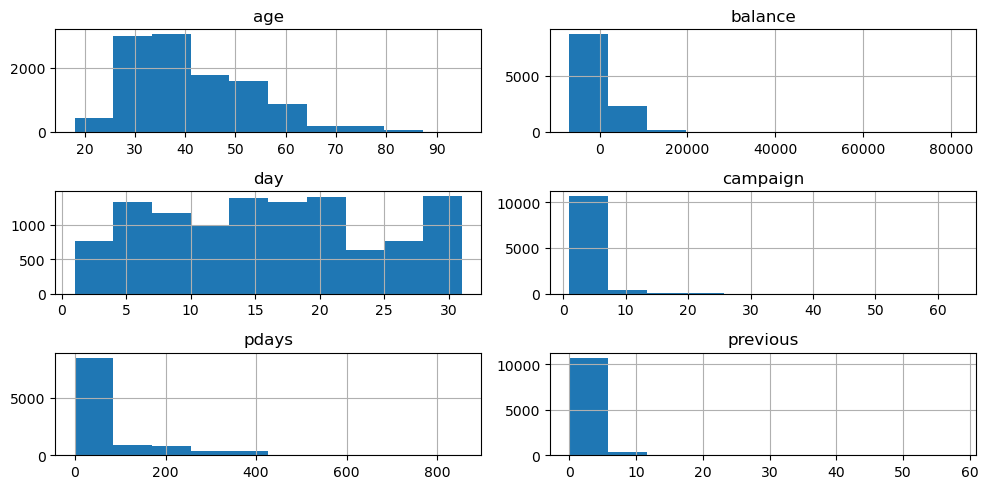

In [9]:
# Exploratory Data Analysis (EDA)
# Histogram of numerical features
df.select_dtypes(include=[np.number]).hist(figsize=(10,5))
plt.tight_layout()
plt.show()


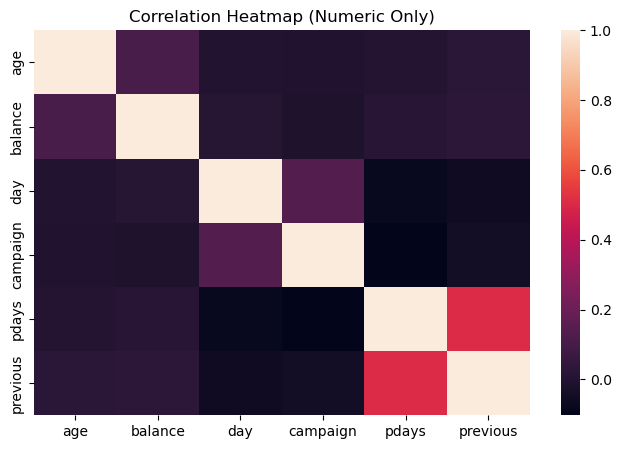

In [10]:
# Correlation heatmap
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot=False)
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()


In [11]:
# Categorical feature distributions
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(f"{col} ({df[col].nunique()}): {df[col].unique()[:10]}")


job (12): ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown']
marital (3): ['married' 'single' 'divorced']
education (4): ['secondary' 'tertiary' 'primary' 'unknown']
default (2): ['no' 'yes']
housing (2): ['yes' 'no']
loan (2): ['no' 'yes']
contact (3): ['unknown' 'cellular' 'telephone']
month (12): ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar']
poutcome (4): ['unknown' 'other' 'failure' 'success']
deposit (2): ['yes' 'no']


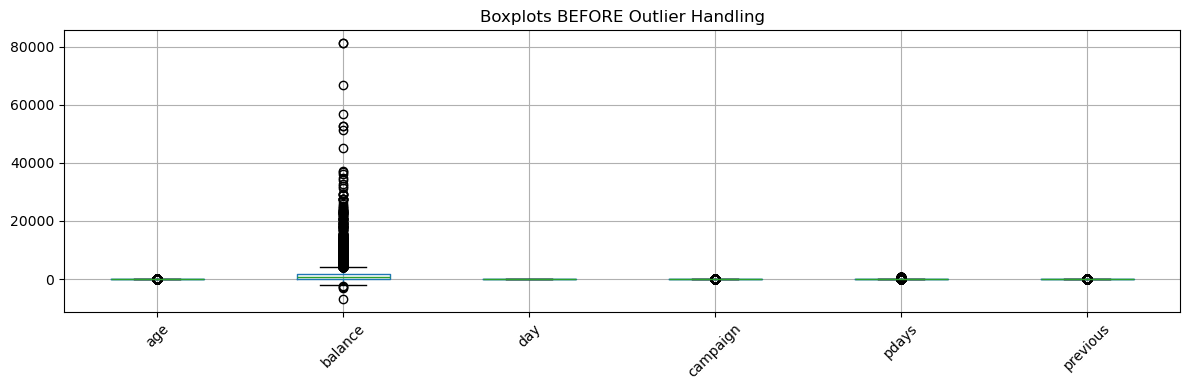

In [12]:
df[num_cols].boxplot(rot=45, figsize=(12,4))
plt.title("Boxplots BEFORE Outlier Handling")
plt.tight_layout()
plt.show()

In [13]:
# Outlier Removal 
df_before = df.shape[0]

outlier_cols = ["balance", "campaign", "pdays", "previous", "age"]

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df_after = df.shape[0]
print("Rows before:", df_before)
print("Rows after :", df_after)
print("Rows dropped:", df_before - df_after)


Rows before: 11162
Rows after : 6954
Rows dropped: 4208


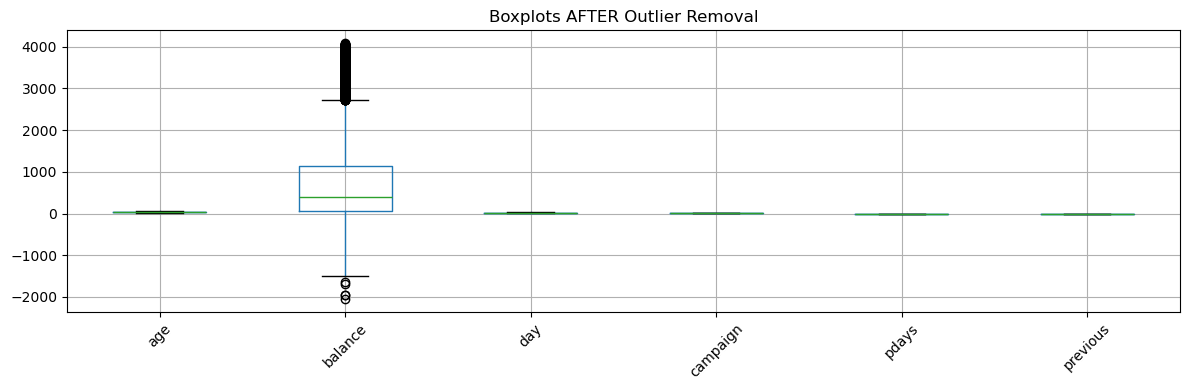

In [14]:
# Boxplots after outlier removal
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].boxplot(rot=45, figsize=(12,4))
plt.title("Boxplots AFTER Outlier Removal")
plt.tight_layout()
plt.show()


In [15]:
cols_drop = ["duration"] 
df = df.drop(columns=cols_drop, errors="ignore")


In [16]:
# Prepare data for modeling
y = df[col_y]
X = df.drop(columns=[col_y])

In [17]:
list(X.columns)


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [18]:
# One-hot encoding for categorical variables
X_ohe = pd.get_dummies(X, drop_first=True)


In [19]:
# Save OHE feature columns for unseen alignment later
feature_cols = X_ohe.columns.tolist()

In [20]:
# Train-test split
from sklearn.model_selection import train_test_split

test_size = 0.3
random_state = 2025

X_train, X_test, y_train, y_test = train_test_split(
    X_ohe, y, test_size=test_size, random_state=random_state, stratify=y
)

X_train.shape, X_test.shape

((4867, 38), (2087, 38))

In [21]:
# Initialise + train model (worst-case baseline)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

logr = LogisticRegression(max_iter=500, random_state=random_state)
logr.fit(X_train, y_train)

c:\Users\onlin\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2025
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [22]:
# Evaluate 
y_pred_logr = logr.predict(X_test)
print("Worst-case LogReg F1 (yes):", f1_score(y_test, y_pred_logr, pos_label="yes"))

Worst-case LogReg F1 (yes): 0.559228650137741
